In [1]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
from __future__ import division
import os,sys
import collections
import numpy as np
import networkx as nx
from scipy import linalg
import community
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.metrics.pairwise import cosine_similarity
# import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_style("ticks")
# sns.set_context("paper")

In [2]:
# N = 1000
# q = 500
# #N = 100
# #q = 60
# #G = nx.watts_strogatz_graph(N, 4, 0.02, seed=1)
# #G = nx.erdos_renyi_graph(N, 0.015, seed=None, directed=False)
# #G = nx.random_regular_graph(5, N, seed=None)

# G = nx.barabasi_albert_graph(N, 3, seed=1)

# #A = np.load("Random_network_N1000.npy")
# #G = nx.from_numpy_matrix(A)
# #G = nx.powerlaw_cluster_graph(N, 5, 0.02, seed=None)

# #s = nx.utils.powerlaw_sequence(1000, 2.5) #100 nodes, power-law exponent 2.5
# #G = nx.expected_degree_graph(s, selfloops=False, seed = 1)
# #L = np.load("zachary.txt")
# #G = nx.from_numpy_matrix(L)
# #G1 = nx.read_edgelist("cat_brain.edges")
# #G1 = nx.read_adjlist("karate.adjlist")

# # from networkx.algorithms.community import LFR_benchmark_graph
# # n = N
# # tau1 = 2
# # tau2 = 1.5
# # mu = 0.4
# # G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10)


# L = nx.adjacency_matrix(G, nodelist=G.nodes(), weight='weight')
# A = L.todense()
# #G = nx.from_numpy_matrix(A)
# print A.shape

In [3]:
N = 34
q = 20
G1 = nx.read_adjlist("karate.adjlist")
L = nx.adjacency_matrix(G1, nodelist=G1.nodes(), weight='weight')
A = L.todense()
np.save("Karate.npy", A)
G = nx.from_numpy_matrix(A)
print A.shape
# A = np.array([[0,0,0,0,0,1,0,0,0],
#               [0,0,0,1,0,0,0,0,0],
#               [0,0,0,0,0,1,0,0,0],
#               [0,1,0,0,1,1,0,0,0],
#               [0,0,0,1,0,1,1,0,0],
#               [1,0,1,1,1,0,1,1,1],
#               [0,0,0,0,1,1,0,1,0],
#               [0,0,0,0,0,1,1,0,1],
#               [0,0,0,0,0,1,0,1,0]])


(34, 34)


(-0.6389803737748986,
 0.6898488438497535,
 -0.875203279806662,
 1.118799304682679)

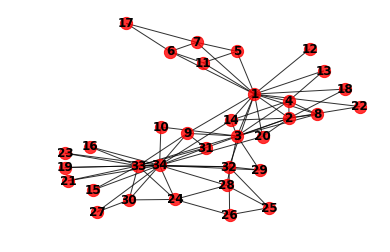

In [48]:
#nx.draw(G1)
pos=nx.spring_layout(G1)
g = G1
nx.draw_networkx_nodes(g, pos = pos, nodelist = g.nodes(), node_color = 'red', node_size = 150, alpha = 0.8)
nx.draw_networkx_edges(g, pos = pos, edgelist = g.edges(), width = 1, alpha = 0.8, edge_color = 'k')
labels=nx.draw_networkx_labels(g, pos=pos, labels=None, font_size=12, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
plt.axis("off")

In [5]:
A[0] == A.T[0]

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True]])

In [6]:
_, _, P2 = linalg.qr(A, mode = 'economic', pivoting = True)

In [7]:
A2 = A[:, P2]

In [8]:
def det_subset_selection(A, ERS, q):
    V_bar = ERS[:, 0:q]  # ERS stands for Eigen vector of right subspace
    _, _, P = linalg.qr(V_bar.T, mode = 'economic', pivoting = True)
    print len(P)
    A_new = A[:, P]
    print A_new.shape
    A_new_q = A_new[:, 0:q]
    print A_new_q.shape
    UA_nq, SigA_nq, VA_nq = linalg.svd(A_new_q, full_matrices = False)
    return UA_nq, SigA_nq, A_new_q, A_new, P

In [9]:
U_A, sig_A, V_A = linalg.svd(A, full_matrices = False)
UA_nq, SigA_nq, A_new_q, A_new, P1 = det_subset_selection(A, V_A.T, q)
print P1

34
(34, 34)
(34, 20)
[25 33 14 27 31 10 12 11 30  2 16  0 15  1 17 18  8  4  9 29 20 21 22 23
 24  7 26  3 28 19  5  6 32 13]


In [10]:
print P2

[31 10 11 12 27 33 15  0 14 16 30  2 18  9 25  4 17  8  1 29 21 13 32 22
  3 19 24  7 28 20  5 26  6 23]


In [11]:
print A2

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [12]:
print A_new

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
A2_q = A2[:, 0:q]
print A2_q.shape
UA_2q, SigA_2q, VA_2q = linalg.svd(A2_q, full_matrices = False)

(34, 20)


In [14]:
print linalg.norm(A, "fro")
print linalg.norm(A2_q, "fro")
print linalg.norm(A_new_q, "fro")

12.489995996796797
11.135528725660043
11.135528725660043


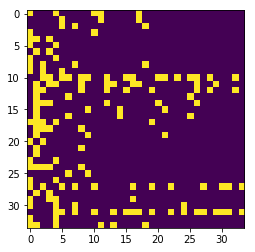

In [15]:
plt.imshow(A2, interpolation = "nearest")

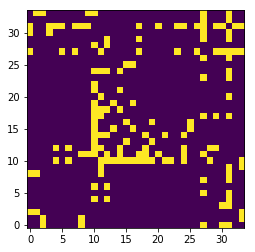

In [16]:
plt.imshow(A, interpolation = "nearest", origin = "lower")

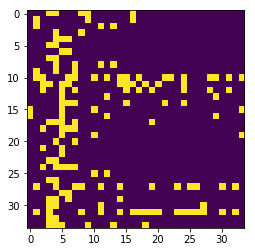

In [17]:
plt.imshow(A_new, interpolation = "nearest")

In [18]:
# deg_A = []
# deg_SS = []
# A_CO = A_new
# A_RO = A_CO[P1, :]
# for i in range(A.shape[1]):
#     deg_A.append(np.sum(A[:,i]))
#     deg_SS.append(np.sum(A_RO[:,i]))

# idx = np.argsort(np.array(deg_A))
# idx_sort = idx[::-1]
# plt.plot(P1, "--o", c = "r")
# plt.plot(idx_sort, "-o", c = "b")    
    
# #plt.plot(deg_A, "-o", c = "navy", label = "$\mathcal{A}$")
# #plt.plot(deg_SS, "--o", c = "brown", label = "$\mathcal{A}_1$")
# plt.legend(loc = 1, prop = {"size": 15})
# plt.tick_params(labelsize = 15)
# plt.xlabel("index", fontsize = 15)
# #plt.text(30,0.15, "q = %s, CS = %0.5f"%(q, CS), fontsize = 15)
# plt.ylabel("degree", fontsize = 15)
# #plt.xlim(0, 200)
# #plt.ylim(0, 0.18)
# plt.tight_layout()   
    
    

In [19]:
# SC_A = nx.subgraph_centrality(G)
# SC  = SC_A.values()
# print SC

In [20]:
#P1

In [21]:
# idx = np.argsort(SC)
# idx_sort = idx[::-1]
# plt.plot(P1, "--o", c = "r")
# plt.plot(idx_sort, "-o", c = "b")

0.9721692533512252


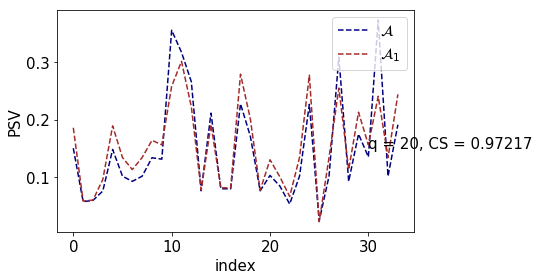

In [22]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
from sklearn.metrics.pairwise import cosine_similarity
a = list(abs(U_A[:,0]))
b = list(abs(UA_nq[:,0]))
CS = cosine_similarity([a, b])[0][1]
print CS
plt.plot(abs(U_A[:,0]), "--", c = "navy", label = "$\mathcal{A}$")
plt.plot(abs(UA_nq[:, 0]), "--", c = "brown", label = "$\mathcal{A}_1$")
plt.legend(loc = 1, prop = {"size": 15})
plt.tick_params(labelsize = 15)
plt.xlabel("index", fontsize = 15)
plt.text(30,0.15, "q = %s, CS = %0.5f"%(q, CS), fontsize = 15)
plt.ylabel("PSV", fontsize = 15)
#plt.xlim(0, 200)
#plt.ylim(0, 0.18)
plt.tight_layout()

In [23]:
Nodes_remove = np.random.choice(range(N), N-q, replace=False)##choosing integers randomly, without repetition
#print Nodes_remove ## Randomly choosing row/column indices to be removed from A
B = A
A_rand = np.delete(B,Nodes_remove,1) 

In [24]:
print linalg.norm(A, "fro")
#print linalg.norm(A_trunc, "fro")
print linalg.norm(A_new_q, "fro")
print linalg.norm(A_rand, "fro")

12.489995996796797
11.135528725660043
9.486832980505138


In [25]:
U_A_rand, sig_A_rand, V_A_rand = linalg.svd(A_rand, full_matrices = False)
print len(sig_A_rand)

20


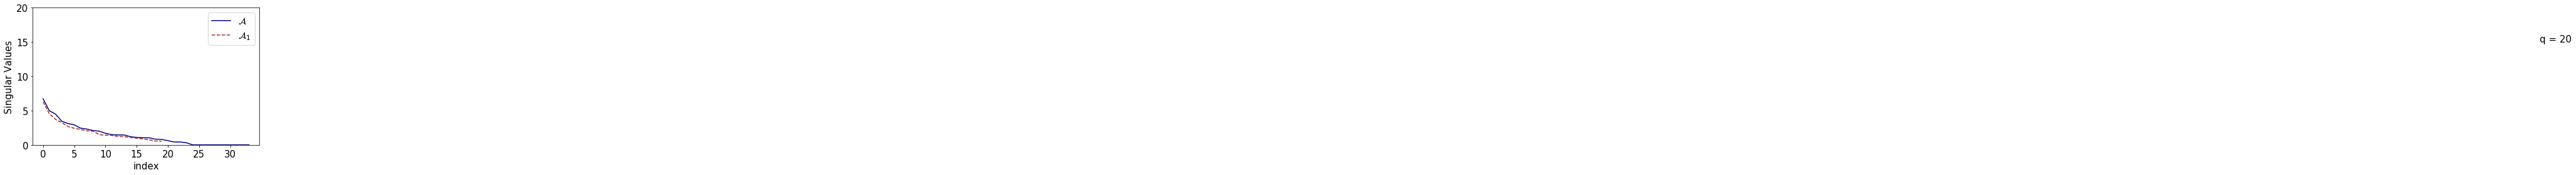

In [26]:
plt.plot(sig_A, c = "navy", label = "$\mathcal{A}$")
plt.plot(SigA_nq, "--", c = "brown", label = "$\mathcal{A}_1$")
#plt.plot(sig_A_rand, ":k", label = "Sig_A_rand_SS")
plt.legend(loc = "best", prop = {"size": 15})
plt.tick_params(labelsize = 15)
plt.xlabel("index", fontsize = 15)
plt.text(400, 15, "q = %s"%q, fontsize = 15)
#plt.text(10, 5, "$\mathcal{A} = %s, \mathcal{A}_1$ = %s" %(linalg.norm(A, "fro"), linalg.norm(A_new_q, "fro")), 
#        fontsize = 15)
plt.ylim(0, 20)
plt.ylabel("Singular Values", fontsize = 15)
plt.tight_layout()

In [27]:
A_CO = A_new
A_RO = A_CO[P1, :] # ordering rows also, according to P1.
A_SS = A_RO[0:q, 0:q]

In [28]:
U_ASS, sig_ASS, V_ASS = linalg.svd(A_SS, full_matrices = False)

/usr/local/lib/python2.7/dist-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/richa/.local/lib/python2.7/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/richa/.local/lib/python2.7/site-packages/matplotlib/transforms.py:2052: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 3., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-3.23249041+0.j, -3.05607693+0.j, -2.87966345+0.j, -2.70324997+0.j,
        -2.5268365 +0.j, -2.35042302+0.j, -2.17400954+0.j, -1.99759607+0.j,
        -1.82118259+0.j, -1.64476911+0.j, -1.46835563+0.j, -1.29194216+0.j,
        -1.11552868+0.j, -0.9391152 +0.j, -0.76270172+0.j, -0.58628825+0.j,
        -0.40987477+0.j, -0.23346129+0.j, -0.05704782+0.j,  0.11936566+0.j,
         0.29577914+0.j,  0.47219262+0.j,  0.64860609+0.j,  0.82501957+0.j,
         1.00143305+0.j,  1.17784652+0.j,  1.35426   +0.j,  1.53067348+0.j,
         1.70708696+0.j,  1.88350043+0.j,  2.05991391+0.j,  2.23632739+0.j,
         2.41274087+0.j,  2.58915434+0.j,  2.76556782+0.j,  2.9419813 +0.j,
         3.11839477+0.j,  3.29480825+0.j,  3.47122173+0.j,  3.64763521+0.j,
         3.824

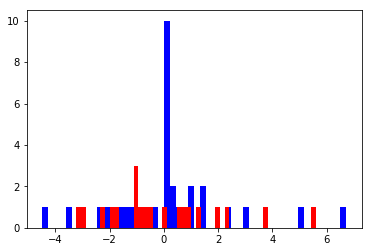

In [29]:
W_A, _ = linalg.eig(A)
W_A_SS, _ = linalg.eig(A_SS) 
#plt.subplot(121)
plt.hist(W_A, bins = 50, facecolor = "b")
plt.hist(W_A_SS, bins = 50, facecolor = "r")

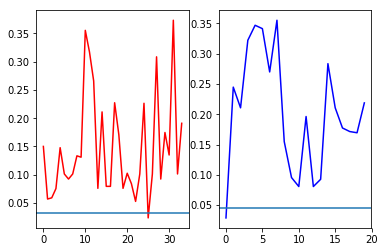

In [30]:
plt.subplot(121)
plt.plot(abs(U_A[:,0]), "-r")
plt.axhline(y = 0.03162)
plt.subplot(122)
plt.plot(abs(U_ASS[:,0]), "-b")
plt.axhline(y = 0.0447)


In [31]:
A_SS.shape

(20, 20)

In [32]:
pos=nx.spring_layout(G)

In [33]:
#nodelist=node_lists_community1, node_color='b'

In [37]:
def full_graph(g):
    #plt.figure(figsize = (10,10))
    nx.draw_networkx_nodes(g, pos = pos, nodelist = g.nodes(), node_color = 'cornflowerblue', node_size = 150, alpha = 0.8)
    nx.draw_networkx_edges(g, pos = pos, edgelist = g.edges(), width = 1, alpha = 0.8, edge_color = 'k')
    labels=nx.draw_networkx_labels(g, pos=pos, labels=None, font_size=12, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
    plt.axis("off")

In [38]:
G_SS = nx.from_numpy_matrix(A_SS)

In [39]:
pos1=nx.spring_layout(G_SS)
def full_graph_SS(g):
    
    #plt.figure(figsize = (10,10))
    
    nx.draw_networkx_nodes(g, pos = pos1, nodelist = g.nodes(), node_color = 'darkorange', node_size = 150, alpha = 0.8)
    nx.draw_networkx_edges(g, pos = pos1, edgelist = g.edges(), width = 1, alpha = 0.8, edge_color = 'k')
    #labels=nx.draw_networkx_labels(g,pos=pos1)
    plt.axis("off")

In [40]:
def colored_subset(g1, g2, p):
    P2 = p
    L_G_n = list(g1.nodes())
    L_G_e = list(g1.edges())
    L_GSS_e = list(g2.edges())
    
    node_color = []
    for i in range(len(L_G_n)):
        if L_G_n[i] in P2:
            node_color.append("darkorange")
        else:
            node_color.append("cornflowerblue")

    nx.draw_networkx_nodes(g1, pos = pos, nodelist = g1.nodes(), node_color = node_color, node_size = 500*abs(U_A[:,0]), alpha = 0.8)
    nx.draw_networkx_edges(g1, pos = pos, edgelist = g1.edges(), width = 1, alpha = 0.8, edge_color = "k")
    #labels=nx.draw_networkx_labels(g1, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
    plt.axis("off")
    
    

In [41]:
np.array([1,2,3])-1

array([0, 1, 2])

In [42]:
com1 = list(np.array([1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22])-1)
com2 =  list(np.array([9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32])-1)

NetworkXError: Node 0 has no position.

<Figure size 288x288 with 0 Axes>

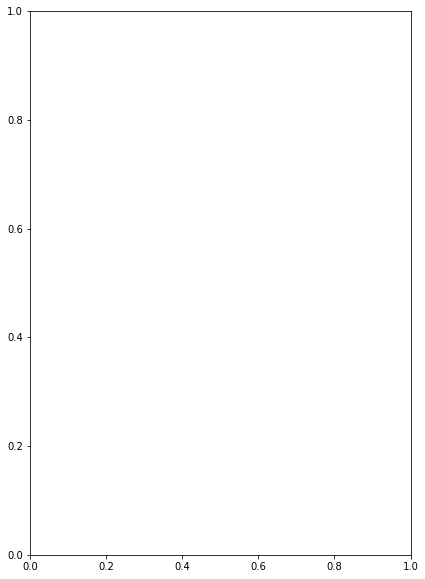

In [46]:
plt.figure(figsize = (4,4))
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
full_graph(G1)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize=12)
#plt.title("full network, nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(A, interpolation = "nearest", cmap = "gray", origin = "lower")
#plt.colorbar()

In [ ]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
#x = 0
#y = -1.25
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize=12)
plt.title("full network, nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize = 15)
#plt.axis("off")
full_graph(G)
plt.subplot(1,2,2)
plt.title("network subset, nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize = 15)
colored_subset(G, G_SS, P1[0:q])
#plt.subplot(1,3,3)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize=12)
#plt.title("subgraph, nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize = 15)
#full_graph_SS(G_SS)



In [ ]:
##Randomly selected subset network, generated by randmly picking columns and rows from the ordered A
Nodes_retain = np.random.choice(range(N), q, replace=False)##choosing integers randomly, without repetition
print Nodes_retain ## Randomly choosing row/column indices to be removed from A
print len(Nodes_retain)
Nodes_delete = np.delete(np.arange(0,N,1), Nodes_retain, 0)
print len(Nodes_delete)
B = A_RO
C = np.delete(B,Nodes_delete,1) #remove columns randomly
D = np.delete(C,Nodes_delete,0) #remove rows randomly, so D is a random subset.
G_R_SS = nx.from_numpy_matrix(D)

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize=12)
plt.title("full network, nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize = 15)
plt.axis("off")
full_graph(G)
plt.subplot(1,3,2)
plt.title("subset, nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize = 15)
colored_subset(G, G_SS, P1[0:q])
plt.subplot(1,3,3)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize=12)
plt.title("random subset, nodes = %s, edges = %s"%(len(G_R_SS.nodes()), len(G_R_SS.edges())), fontsize = 15)
colored_subset(G, G_R_SS, Nodes_retain)



In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
#plt.text(x, y, "nodes = %s, edges = %s"%(len(G.nodes()), len(G.edges())), fontsize=12)
plt.title("subset, nodes = %s, edges = %s"%(len(G_SS.nodes()), len(G_SS.edges())), fontsize = 15)
full_graph_SS(G_SS)
plt.subplot(1,2,2)
plt.title("random subset, nodes = %s, edges = %s"%(len(G_R_SS.nodes()), len(G_R_SS.edges())), fontsize = 15)
full_graph_SS(G_R_SS)

In [ ]:
##Network properties
#from networkx.algorithms import smallworld
CC_A = nx.average_clustering(G, nodes=None, weight=None, count_zeros=True)
SPL_A = nx.average_shortest_path_length(G, weight=None)
deg_A = G.degree(nbunch=None, weight=None)
avgdeg_A = np.mean(np.array(dict(deg_A).values()))
dia_A = nx.diameter(G, e=None)
den_A = nx.density(G)
gef_A = nx.global_efficiency(G)
lef_A = nx.local_efficiency(G)
#SWI_A = nx.algorithms.smallworld.sigma(G, niter=100, nrand=10, seed=None)

In [ ]:
##Subset Properties
CC_ASS = nx.average_clustering(G_SS, nodes=None, weight=None, count_zeros=True)
SPL_ASS = nx.average_shortest_path_length(G_SS, weight=None)
deg_ASS = G_SS.degree(nbunch=None, weight=None)
avgdeg_ASS = np.mean(np.array(dict(deg_ASS).values()))
dia_ASS = nx.diameter(G_SS, e=None)
den_ASS = nx.density(G_SS)
gef_ASS = nx.global_efficiency(G_SS)
lef_ASS = nx.local_efficiency(G_SS)
#SWI_ASS = nx.omega(G_SS, niter=100, nrand=10, seed=None)

In [ ]:
print CC_A, SPL_A, avgdeg_A, dia_A, den_A, gef_A, lef_A
print CC_ASS, SPL_ASS, avgdeg_ASS, dia_ASS, den_ASS, gef_ASS, lef_ASS

In [ ]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
CC = np.array([CC_A, CC_ASS])
SPL = np.array([SPL_A, SPL_ASS])
avgdeg = np.array([avgdeg_A, avgdeg_ASS])
dia = np.array([dia_A, dia_ASS])
den = np.array([den_A, den_ASS])
gef = np.array([gef_A, gef_ASS])
plt.xticks(np.arange(6), ["CC", "SPL", "AD", "DIA", "DEN", "GE"])
plt.plot(np.arange(6), [CC_A/max(CC), SPL_A/max(SPL), avgdeg_A/max(avgdeg), dia_A/max(dia), den_A/max(den), gef_A/max(gef)], "--o", c = "navy",  label = "$\mathcal{A}$")
plt.plot(np.arange(6), [CC_ASS/max(CC), SPL_ASS/max(SPL), avgdeg_ASS/max(avgdeg), dia_ASS/max(dia), den_A, gef_A/max(gef)],"--o",c = "brown", label = "$\mathcal{B}$")
plt.tick_params(labelsize = 15)
plt.legend(loc = "best", prop={"size":15})
plt.tight_layout()
plt.xlabel("Network Properties", fontsize = 15)
plt.ylabel("Normalized values", fontsize = 15)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.1, 5.5)
plt.tight_layout()
plt.grid()

In [ ]:
#inverse participation ratio
def IPR(v):
    S = np.sum(v**4)
    return S


In [ ]:
#print U_A[:,0]
PSV = U_A[:,0]
#print PSV
I = IPR(PSV)
#print I
S = []
for i in range(len(P1[0:q])):
    S.append(PSV[int(P1[i])])
I_SS = IPR(np.array(S))

S2 = []
for i in range(len(Nodes_retain)):
    S2.append(PSV[int(Nodes_retain[i])])
I_RSS = IPR(np.array(S2))
#print S
print "IPR for full graph nodes, subset nodes, random subset nodes = %s, %s, %s" %(I, I_SS, I_RSS)
    

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Degree Histogram of full network", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Degree", fontsize = 15)
plt.tick_params(labelsize = 8)
plt.xticks(rotation=0)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

In [ ]:
import collections
degree_sequence = sorted([d for n, d in G_SS.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.8, color='b')

plt.title("Degree Histogram of subset", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Degree", fontsize = 15)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G_SS), key=len, reverse=True)[0]
pos = nx.spring_layout(G_SS)
plt.axis('off')
nx.draw_networkx_nodes(G_SS, pos, node_size=20)
nx.draw_networkx_edges(G_SS, pos, alpha=0.4)


In [ ]:
LA = nx.normalized_laplacian_matrix(G, nodelist=None, weight='weight')
LS = nx.normalized_laplacian_matrix(G_SS, nodelist=None, weight='weight')

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121)
e = np.linalg.eigvals(LA.A)
eig_A = np.sort(e)
print eig_A[0], eig_A[1]
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.subplot(122)
e = np.linalg.eigvals(LS.A)
eig_A_SS = np.sort(e)
print eig_A_SS[0], eig_A_SS[1]
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()


In [ ]:
Fv_G = nx.fiedler_vector(G, weight='weight', normalized=False, tol=1e-08, method='tracemin_pcg')
Fv_G_SS = nx.fiedler_vector(G_SS, weight='weight', normalized=False, tol=1e-08, method='tracemin_pcg')

In [ ]:
print len(Fv_G), len(Fv_G_SS)
plt.plot(np.sort(Fv_G), "-ob")
plt.plot(np.sort(Fv_G_SS), "-or")

In [ ]:
pos = nx.spring_layout(G)
def node_sized_subset(g1, g2, p):
    P2 = p
    L_G_n = list(g1.nodes())
    L_G_e = list(g1.edges())
    L_GSS_e = list(g2.edges())
    part = community.best_partition(g1)
    #print part
    mod = community.modularity(part,g1)
    values = [part.get(node) for node in G.nodes()]
    node_size = []
    for i in range(len(L_G_n)):
        if L_G_n[i] in P2:
            node_size.append(200)
        else:
            node_size.append(20)
    nx.draw_networkx_nodes(g1, pos = pos, cmap=plt.get_cmap('jet'), nodelist = g1.nodes(), node_color = values, node_size = node_size, alpha = 0.8)
    nx.draw_networkx_edges(g1, pos = pos, edgelist = g1.edges(), width = 1, alpha = 0.8, edge_color = "k")
    labels=nx.draw_networkx_labels(g1, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
    plt.axis("off")

In [ ]:
#plt.figure(figsize = (10, 5))
part = community.best_partition(G)
mod = community.modularity(part,G)
#pos = nx.spring_layout(G)
# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
#print mod
#print part
#print values
#labels = nx.draw_networkx_labels(G, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
#nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=150, with_labels=False)
#plt.show()
nx.draw_networkx_nodes(G, pos = pos, cmap=plt.get_cmap('jet'), nodelist = G.nodes(), node_color = values, node_size = 100, alpha = 0.8)
nx.draw_networkx_edges(G, pos = pos, edgelist = G.edges(), width = 1, alpha = 0.8, edge_color = "k")
labels=nx.draw_networkx_labels(G, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
plt.axis("off")

In [ ]:
plt.figure(figsize = (10,5))
#plt.subplot(121)
part = community.best_partition(G_SS)
mod = community.modularity(part,G_SS)
#pos = nx.spring_layout(G_SS)
# Plot, color nodes using community structure
values = [part.get(node) for node in G_SS.nodes()]
#labels = nx.draw_networkx_labels(G, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
#nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=150, with_labels=False)
#plt.show()
nx.draw_networkx_nodes(G_SS, pos = pos, cmap=plt.get_cmap('jet'), nodelist = G_SS.nodes(), node_color = values, node_size = 100, alpha = 0.8)
nx.draw_networkx_edges(G_SS, pos = pos, edgelist = G_SS.edges(), width = 1, alpha = 0.8, edge_color = "k")
labels = {}
for i in range(len(G_SS.nodes())):
    labels[i] = str(P1[0:q][i])
nx.draw_networkx_labels(G_SS,pos,labels,font_size=16)
#labels=nx.draw_networkx_labels(G_SS, pos=pos, labels=None, font_size=10, font_color='k', font_family='sans-serif', font_weight='heavy', alpha=1.0, bbox=None, ax=None)
plt.axis("off")
# plt.subplot(122)
# node_sized_subset(G, G_SS, P1[0:q])

In [ ]:
plt.figure(figsize = (10,10))
node_sized_subset(G, G_SS, P1[0:q])

In [ ]:
import community
part = community.best_partition(G_SS)
mod = community.modularity(part,G_SS)
# Plot, color nodes using community structure
values = [part.get(node) for node in G_SS.nodes()]
nx.draw_spring(G_SS, cmap=plt.get_cmap('jet'), node_color = values, node_size=150, with_labels=False)
plt.show()

In [ ]:
a = [0.0307]*10
b = [0.0229, 0.0275, 0.0289, 0.0296, 0.0299, 0.0301, 0.0303, 0.0303, 0.0305,0.0307 ]
c = [0.0002, 0.0011, 0.0094, 0.0040, 0.0078, 0.0176, 0.0149, 0.0211, 0.0303, 0.0307]

In [ ]:
Q = np.linspace(10, 100, 10)
print Q

In [ ]:
plt.plot(Q, a, "-or", label = "IPR_A")
plt.plot(Q, b, "--ob", label = "IPR_A_SS")
plt.plot(Q, c, ":ok", label = "IPR_A_RSS")
plt.xlabel("q", fontsize = 15)
plt.ylabel("Inverse Partn. Ratio", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.legend(loc = "best", prop={"size":15})
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
##Random Subset Properties
CC_ARSS = nx.average_clustering(G_R_SS, nodes=None, weight=None, count_zeros=True)
#SPL_ARSS = nx.average_shortest_path_length(G_R_SS, weight=None)
deg_ARSS = G_R_SS.degree(nbunch=None, weight=None)
avgdeg_ARSS = np.mean(np.array(dict(deg_ARSS).values()))
#dia_ARSS = nx.diameter(G_R_SS, e=None)
den_ARSS = nx.density(G_R_SS)
gef_ARSS = nx.global_efficiency(G_R_SS)

In [ ]:
print CC_A, SPL_A, avgdeg_A, dia_A, den_A, gef_A
print CC_ASS, SPL_ASS, avgdeg_ASS, dia_ASS, den_ASS, gef_ASS
print CC_ARSS, SPL_ARSS, avgdeg_ARSS, dia_ARSS, den_ARSS, gef_ARSS

In [ ]:
for i in range(len(A_trunc)):
    for j in range(len(A_trunc[i])):
        if A_trunc[i][j] >= 0.99:
            A_trunc[i][j] = 1
            A_trunc[j][i] = A_trunc[i][j]
        else:
            A_trunc[i][j] = 0
            A_trunc[j][i] = A_trunc[i][j]
            

In [ ]:
G_t_SS = nx.from_numpy_matrix(A_trunc)
CC_A_t_SS = nx.average_clustering(G_t_SS, nodes=None, weight=None, count_zeros=True)
SPL_A_t_SS = nx.average_shortest_path_length(G_t_SS, weight=None)
deg_A_t_SS = G_t_SS.degree(nbunch=None, weight=None)
avgdeg_A_t_SS = np.mean(np.array(dict(deg_A_t_SS).values()))
dia_A_t_SS = nx.diameter(G_t_SS, e=None)
den_A_t_SS = nx.density(G_t_SS)
gef_A_t_SS = nx.global_efficiency(G_t_SS)

In [ ]:
print CC_A, SPL_A, avgdeg_A, dia_A, den_A, gef_A
print CC_ASS, SPL_ASS, avgdeg_ASS, dia_ASS, den_ASS, gef_ASS
print CC_ARSS, SPL_ARSS, avgdeg_ARSS, dia_ARSS, den_ARSS, gef_ARSS
print CC_A_t_SS, SPL_A_t_SS, avgdeg_A_t_SS, dia_A_t_SS, den_A_t_SS, gef_A_t_SS

# print CC_A, avgdeg_A, den_A, gef_A
# print CC_ASS, avgdeg_ASS, den_A, gef_A
# print CC_ARSS, avgdeg_ARSS, den_A, gef_A

In [ ]:
#xticks = ["CC", "SPL", "AD", "DIA", "DEN", "GE"]
#from __future__ import divison
plt.xticks(np.arange(6), ("$CC$", "$SPL$", "$AD$", "$DIA$", "$DEN$", "$GE$"))
plt.plot(np.arange(6), [CC_A, SPL_A, avgdeg_A, dia_A, den_A, gef_A], "--ok",  label = "A")
plt.plot(np.arange(6), [CC_ASS, SPL_ASS, avgdeg_ASS, dia_ASS, den_A, gef_A],"--or", label = "A_SS")
plt.plot(np.arange(6), [CC_ARSS, SPL_ARSS, avgdeg_ARSS, dia_ARSS, den_ARSS, gef_ARSS], "--ob", label = "A_R_SS")
plt.plot(np.arange(6), [CC_A_t_SS, SPL_A_t_SS, avgdeg_A_t_SS, dia_A_t_SS, den_A_t_SS, gef_A_t_SS], "-.om", label = "A_t_SS")
plt.tick_params(labelsize = 15)
plt.legend(loc = "best", prop={"size":15})
plt.tight_layout()

In [ ]:
#normalized = (x-min(x))/(max(x)-min(x))
from __future__ import division
# CC = np.array([CC_A, CC_ASS, CC_ARSS])
# SPL = np.array([SPL_A, SPL_ASS, SPL_ARSS])
# avgdeg = np.array([avgdeg_A, avgdeg_ASS])
# dia = np.array([dia_A, dia_ASS, dia_A_R_SS])
# den = np.array([den_A, den_ASS, den_A_R_SS])
# gef = np.array([gef_A, gef_ASS, gef_A_R_SS])
CC = np.array([CC_A, CC_ASS, CC_ARSS, CC_A_t_SS])
SPL = np.array([SPL_A, SPL_ASS, SPL_ARSS, SPL_A_t_SS])
avgdeg = np.array([avgdeg_A, avgdeg_ASS, avgdeg_ARSS, avgdeg_A_t_SS])
dia = np.array([dia_A, dia_ASS, dia_ARSS, dia_A_t_SS])
den = np.array([den_A, den_ASS, den_ARSS, den_A_t_SS])
gef = np.array([gef_A, gef_ASS, gef_ARSS, gef_A_t_SS])
def norm_CC(a):
    b = (a-min(CC))/(max(CC)-min(CC))
    return b
def norm_SPL(a):
    b = (a-min(SPL))/(max(SPL)-min(SPL))
    return b
def norm_avgdeg(a):
    b = (a-min(avgdeg))/(max(avgdeg)-min(avgdeg))
    return b
def norm_dia(a):
    if dia[0] == dia[1] and dia[0] == dia[2] and dia[0] == dia[3]:
        return 1
    else:
        b = (a-min(dia))/(max(dia)-min(dia))
        return b
def norm_den(a):
    b = (a-min(den))/(max(den)-min(den))
    return b
def norm_gef(a):
    b = (a-min(gef))/(max(gef)-min(gef))
    return b


In [ ]:
plt.xticks(np.arange(6), ("$CC$", "$SPL$", "$AD$", "$DIA$", "$DEN$", "$GE$"))
plt.plot(np.arange(6), [norm_CC(CC_A), norm_SPL(SPL_A), norm_avgdeg(avgdeg_A), norm_dia(dia_A), norm_den(den_A), norm_gef(gef_A)], "-ok",  label = "A")
plt.plot(np.arange(6), [norm_CC(CC_ASS), norm_SPL(SPL_ASS), norm_avgdeg(avgdeg_ASS), norm_dia(dia_ASS), norm_den(den_A), norm_gef(gef_A)],"--or", label = "A_SS")
plt.plot(np.arange(6), [norm_CC(CC_ARSS), norm_SPL(SPL_ARSS), norm_avgdeg(avgdeg_ARSS), norm_dia(dia_ARSS), norm_den(den_ARSS), norm_gef(gef_ARSS)], ":ob", label = "A_R_SS")
plt.plot(np.arange(6), [norm_CC(CC_A_t_SS), norm_SPL(SPL_A_t_SS), norm_avgdeg(avgdeg_A_t_SS), norm_dia(dia_A_t_SS), norm_den(den_A_t_SS), norm_gef(gef_A_t_SS)], "-.om", label = "A_t_SS")
plt.tick_params(labelsize = 15)
plt.legend(loc = "best", prop={"size":15})
plt.grid()
plt.title("SFq800", fontsize = 15)
plt.ylim(-0.5, 1.5)
plt.tight_layout()

In [ ]:
# plt.imshow(A_trunc, interpolation = "nearest")
# plt.colorbar()
#A_trunc[0]

In [ ]:
# plt.imshow(A, interpolation = "nearest")
# plt.colorbar()

In [ ]:
# plt.imshow(A_SS, interpolation = "nearest")

In [ ]:
# plt.imshow(D, interpolation = "nearest")

In [ ]:
# plt.imshow(A_trunc, interpolation = "nearest")
# plt.colorbar()

In [ ]:
# A_trunc[0]

In [ ]:
#     edge_color = []
#     for i in range(len(L_G_e)):
#         if L_G_e[i] in L_GSS_e:
#             edge_color.append("brown")
#         else:
#             edge_color.append("white")        
    
#     edge_list_G = list(G.edges())
#     edge_list_GSS = list(G_SS.edges())
#     edge_list = []
#     for i in range(len(edge_list_GSS)):
#         if edge_list_GSS[i] in edge_list_G:
#             edge_list.append(edge_list_GSS[i])
        
#     print len(edge_list_G), len(edge_list_GSS), len(edge_list)
#     #plt.figure(figsize = (5,5))
    #plt.subplot(121)
    #pos=nx.spring_layout(G)
    #plt.figure(figsize = (10,10))